# Try to use the Hugging Face time-series transformer

Documentation for this model is available [here](https://huggingface.co/docs/transformers/main/model_doc/time_series_transformer).

This didn't really work. Couldn't get it to work with our data. Found author's repository of transformers, trying to use that instead.

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image
import torch

# Hugging Face transformer
from transformers import TimeSeriesTransformerForPrediction, TimeSeriesTransformerConfig

2022-11-07 17:45:35.226437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 17:45:35.501638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 17:45:35.501659: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-07 17:45:35.535302: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 17:45:36.834750: W tensorflow/stream_executor/platform/de

In [3]:
# Import data
temp1 = pd.read_csv("../data/initial_data/2050HighMedium.csv")
#batch = torch.load("../data/initial_data/2050HighMedium.csv")
torch.save(temp1, "saved")
data = torch.load("saved")

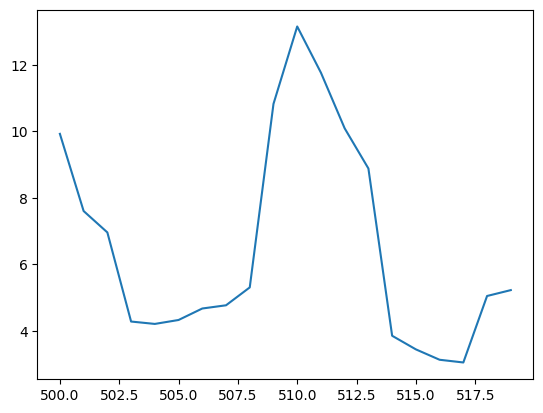

19


In [4]:
plt.plot(data["Scotland"][500:520])
plt.show()
print(data["Scotland"][500:519].size)

In [5]:
# Process data
i = 0
raw_data = data["Scotland"].to_list()
length = data.shape[0]
p_length = 10
c_length = 20
context_data = []
future_data = []
static_categorical = []
static_real = [] 
time_features = []
past_observed_mask = []
while (i+p_length+c_length) < length:
    context_data.append(raw_data[i:i+c_length])
    future_data.append(raw_data[i+c_length:i+c_length+p_length])
    static_categorical.append([1])
    static_real.append([1])
    time_features.append([i])
    past_observed_mask.append([1])
    i += c_length + p_length

In [6]:
# Configure model
configuration = TimeSeriesTransformerConfig(prediction_length=p_length,
                                            context_length=c_length,
                                            num_static_real_features=1,
                                            num_static_categorical_features=1,
                                            num_time_features=1
                                            )

model = TimeSeriesTransformerForPrediction(configuration)

ValueError: embed_dim must be divisible by num_heads (got `embed_dim`: 11 and `num_heads`: 2).

In [103]:
# Train model 
outputs = model(
    past_values=torch.tensor(context_data),
    future_values=torch.tensor(future_data),
    past_time_features=torch.tensor(time_features),
    past_observed_mask=torch.tensor(past_observed_mask),
    static_categorical_features=torch.tensor(static_categorical),
    static_real_features=torch.tensor(static_real)
)

TypeError: expected Tensor as element 1 in argument 0, but got NoneType

In [100]:
torch.tensor(static_real)

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],